In [138]:
# Importando las librerias básicas
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Código usado para importar datos a google colab
from google.colab import files
files.upload()

In [140]:
df=pd.read_csv("df_heartfailure.csv")
df=df.iloc[:,1:13]
print("Las primeras cinco instancias son:")
df.head()

Las primeras cinco instancias son:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [141]:
# Separamos las variables del target
Y=df["HeartDisease"]
X=df.iloc[:,0:11]

In [143]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


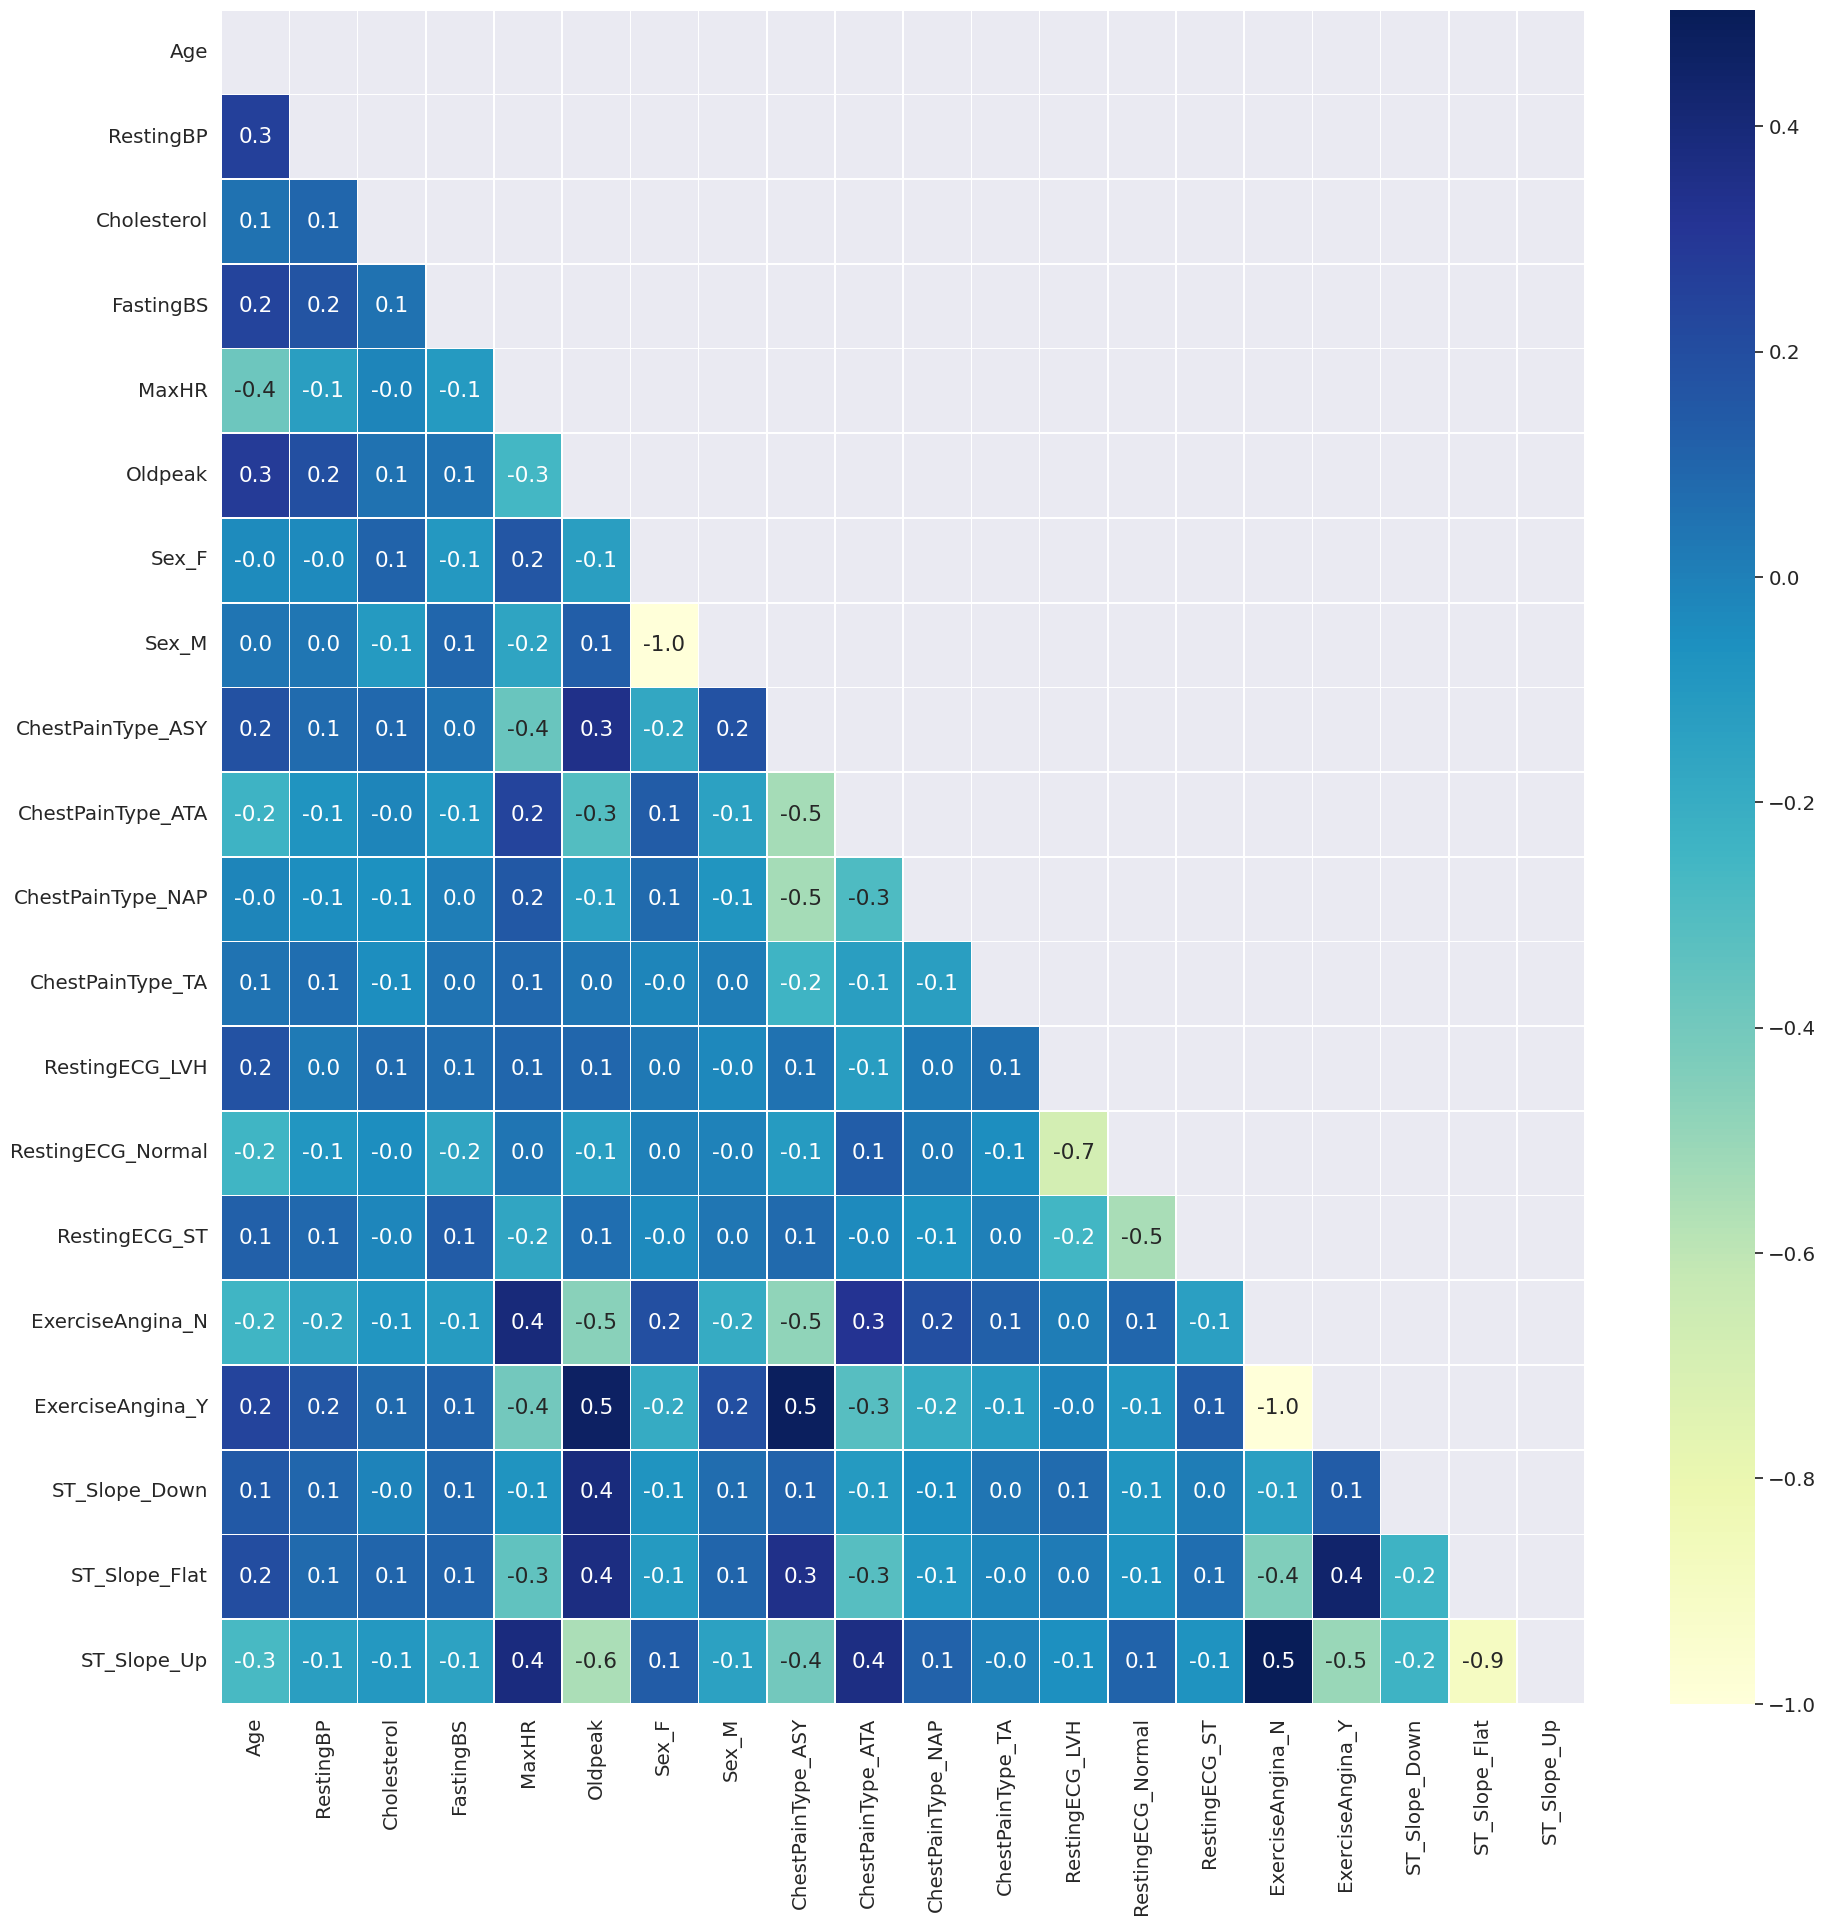

In [157]:
# Grafica de la matriz de correlación
f,ax = plt.subplots(figsize=(22, 22))
matrix = np.triu(X.corr())
sns.set(font_scale=1.3)
plt.grid()
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix,cmap="YlGnBu")
plt.show()

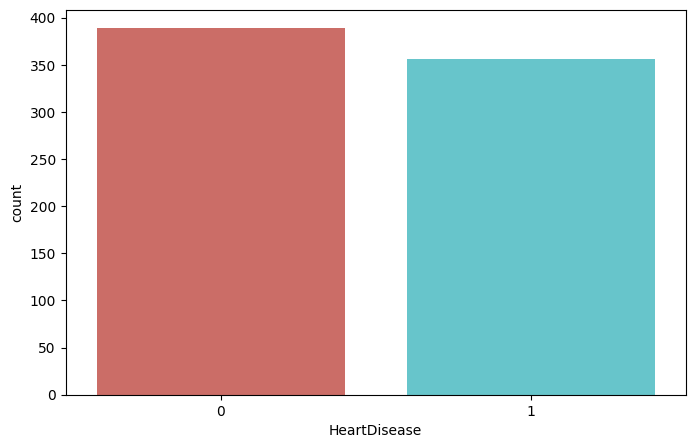

In [155]:
plt.figure(figsize = (8,5))
sns.countplot(Y,palette="hls")
plt.show()

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [147]:
model = RandomForestClassifier(n_estimators=100, criterion="gini", n_jobs = -1,random_state = 100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [148]:
print("The Accuracy Score for the model is {:.2f} %\n".format(model.score(X_test,y_test)*100))

The Accuracy Score for the model is 90.60 %



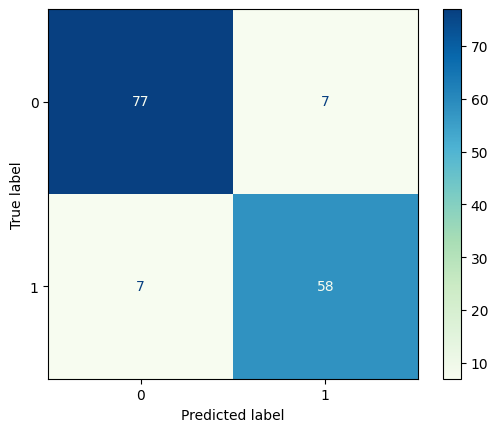

In [149]:
plt.style.use('default')
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.GnBu)
plt.show()

In [150]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        84
           1       0.89      0.89      0.89        65

    accuracy                           0.91       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.91      0.91      0.91       149



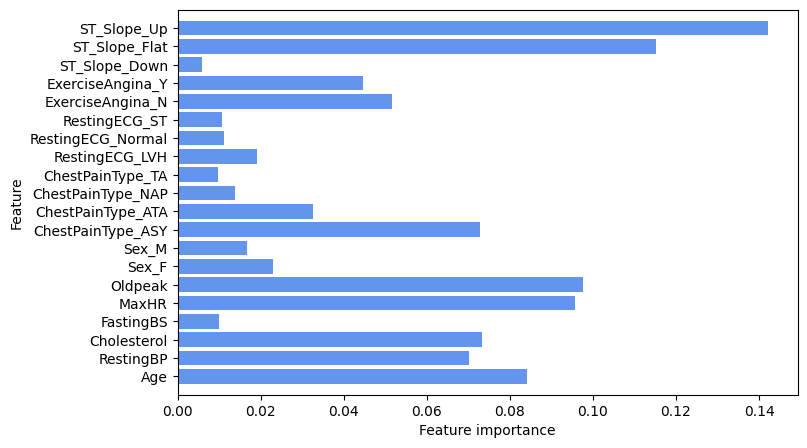

In [153]:
plt.figure(figsize=(8,5))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center',color="cornflowerblue")
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()